# Load Dataset

In [1]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = 'dataset\CompleteDataset.csv'
df = pd.read_csv(file_path)

# Function to fix values like "70+9" and ensure all numeric data
def fix_values(value):
    if isinstance(value, str) and '+' in value:
        base, addition = map(int, value.split('+'))
        return base + addition
    elif isinstance(value, str) and value.isdigit():
        return int(value)  # Convert valid integer strings
    elif isinstance(value, (int, float)):
        return value  # Keep numeric values unchanged
    else:
        return np.nan  # Handle unexpected or invalid values gracefully

# Merge positions before cleaning
def merge_positions(position):
    if position in ['LWB', 'LB']:
        return 'LB'
    elif position in ['RWB', 'RB']:
        return 'RB'
    elif position in ['CF', 'ST']:
        return 'ST'
    elif position in ['CAM', 'CDM', 'CM']:
        return 'CM'
    else:
        return position

# Keep only specified attributes and fix values
attributes_to_keep = [
    'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing',
    'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
    'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
    'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
    'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
    'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'Preferred Positions'
]

df_cleaned = df[attributes_to_keep]

# Apply fix_values function to all relevant columns
for column in df_cleaned.columns:
    if column != 'Preferred Positions':  # Skip the target column
        df_cleaned[column] = df_cleaned[column].apply(fix_values)

# Drop rows with NaN values (if any remain after processing)
df_cleaned.dropna(inplace=True)

# Keep only the first preferred position (if there are multiple positions)
df_cleaned['Preferred Position'] = df_cleaned['Preferred Positions'].apply(lambda x: x.split(' ')[0])

# Merge positions
df_cleaned['Preferred Position'] = df_cleaned['Preferred Position'].apply(merge_positions)

# Display the cleaned dataset with merged positions
print("Cleaned Dataset Sample:")
print(df_cleaned[['Preferred Position']].head())

# Print all positions and how many players have that position
position_counts = df_cleaned['Preferred Position'].value_counts()
print("\nPositions and the number of players in each position:")
print(position_counts)

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:4: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'dataset\CompleteDataset.csv'
C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:5: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].apply(fix_values)


Cleaned Dataset Sample:
  Preferred Position
0                 ST
1                 RW
2                 LW
3                 ST
4                 GK

Positions and the number of players in each position:
Preferred Position
CM    4415
CB    2661
ST    2440
GK    1994
LB    1405
RM    1319
LM    1306
RB    1286
RW     423
LW     421
Name: count, dtype: int64


C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)
C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Preferred Position'] = df_cleaned['Preferred Positions'].apply(lambda x: x.split(' ')[0])
C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\2384095182.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Visualisation

C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\1709580398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')


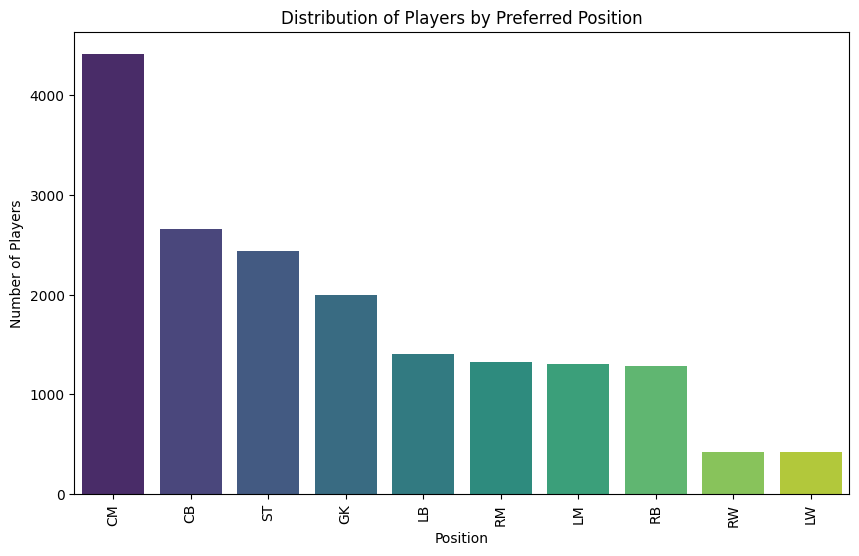

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players for each position
position_counts = df_cleaned['Preferred Position'].value_counts()

# Visualize the class distribution (number of elements per class)
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')

# Add labels and title
plt.title('Distribution of Players by Preferred Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Encode the target variable (Preferred Position)
label_encoder = LabelEncoder()
df_cleaned['Position_Encoded'] = label_encoder.fit_transform(df_cleaned['Preferred Position'])

# Split dataset into features (X) and target (y)
X = df_cleaned.drop(columns=['Preferred Positions', 'Preferred Position', 'Position_Encoded'])
y = df_cleaned['Position_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
svm_param_grid = {
    'C': [1, 10],
    'kernel': ['rbf'],
}

# Initialize models
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Initialize GridSearchCV for each model
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit models with GridSearchCV
nb_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)

# Get best models and predictions
best_nb_model = nb_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_

# Make predictions on the test set
nb_predictions = best_nb_model.predict(X_test)
rf_predictions = best_rf_model.predict(X_test)
svm_predictions = best_svm_model.predict(X_test)

# Print parameters for each model
print("Naive Bayes Best Parameters:", nb_grid_search.best_params_)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("SVM Best Parameters:", svm_grid_search.best_params_)

# Print Classification Reports
print("\nClassification Reports:")
print("Naive Bayes:\n", classification_report(y_test, nb_predictions))
print("Random Forest:\n", classification_report(y_test, rf_predictions))
print("SVM:\n", classification_report(y_test, svm_predictions))


C:\Users\mboui\AppData\Local\Temp\ipykernel_17500\685761612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position_Encoded'] = label_encoder.fit_transform(df_cleaned['Preferred Position'])
c:\Users\mboui\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Naive Bayes Best Parameters: {'var_smoothing': 1e-09}
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}

Classification Reports:
Naive Bayes:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       550
           1       0.63      0.56      0.59       878
           2       1.00      1.00      1.00       365
           3       0.32      0.34      0.33       290
           4       0.18      0.11      0.13       254
           5       0.08      0.25      0.13        75
           6       0.27      0.26      0.27       244
           7       0.26      0.14      0.18       291
           8       0.09      0.16      0.12        81
           9       0.75      0.77      0.76       506

    accuracy                           0.55      3534
   macro avg       0.43      0.44      0.43      3534
weighted avg       0.56      0.55      

c:\Users\mboui\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mboui\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mboui\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\mboui\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


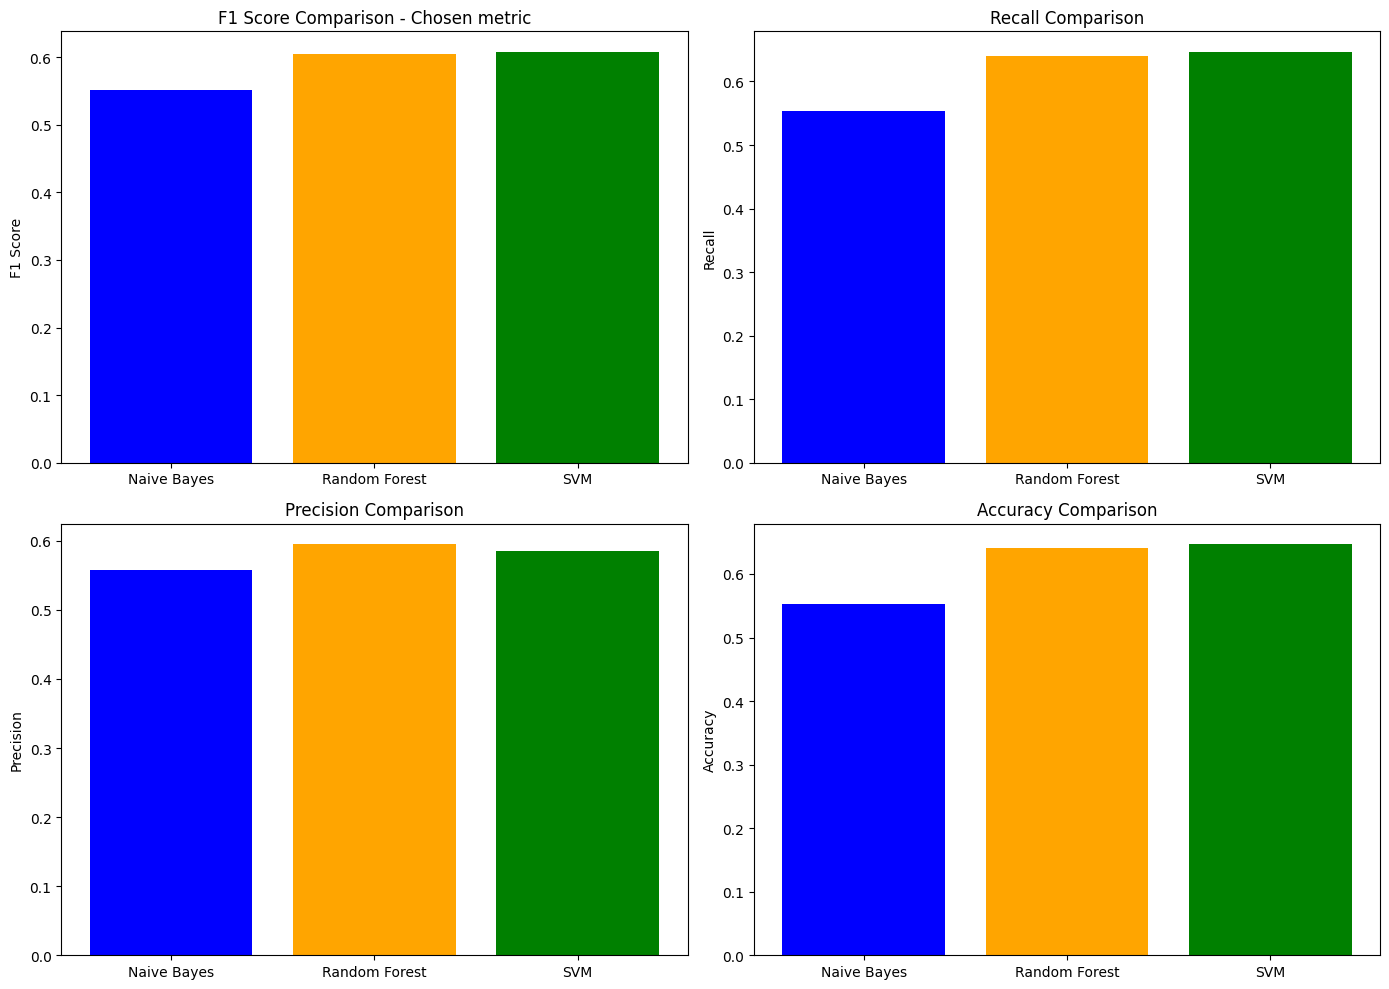

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate the metrics for each model

# Naive Bayes Metrics
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')

# Random Forest Metrics
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')

# SVM Metrics
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')

# Prepare the data for plotting
labels = ['Naive Bayes', 'Random Forest', 'SVM']
f1_scores = [nb_f1, rf_f1, svm_f1]
recall_scores = [nb_recall, rf_recall, svm_recall]
accuracy_scores = [nb_accuracy, rf_accuracy, svm_accuracy]
precision_scores = [nb_precision, rf_precision, svm_precision]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# F1 Score Comparison
axes[0, 0].bar(labels, f1_scores, color=['blue', 'orange', 'green'])
axes[0, 0].set_title('F1 Score Comparison - Chosen metric')
axes[0, 0].set_ylabel('F1 Score')

# Recall Comparison
axes[0, 1].bar(labels, recall_scores, color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Recall Comparison')
axes[0, 1].set_ylabel('Recall')

# Precision Comparison
axes[1, 0].bar(labels, precision_scores, color=['blue', 'orange', 'green'])
axes[1, 0].set_title('Precision Comparison')
axes[1, 0].set_ylabel('Precision')

# Accuracy Comparison
axes[1, 1].bar(labels, accuracy_scores, color=['blue', 'orange', 'green'])
axes[1, 1].set_title('Accuracy Comparison')
axes[1, 1].set_ylabel('Accuracy')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
